In [1]:
#load the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

In [2]:
Seed = 5000

In [3]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-UW/DS-Playground/master/train.csv',sep = ",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
#Remove unwanted columns
df.drop(['PassengerId','Name','Ticket','Cabin'],'columns',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [13]:
df['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

### Data Visualization

Text(0, 0.5, 'Survived')

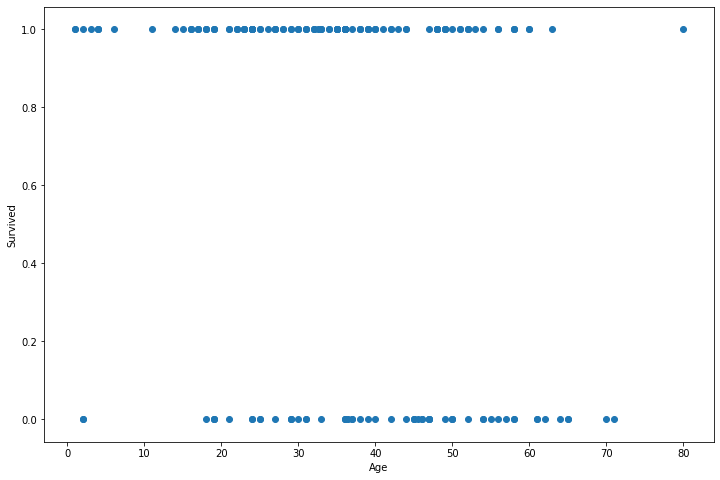

In [14]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(df['Age'],df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

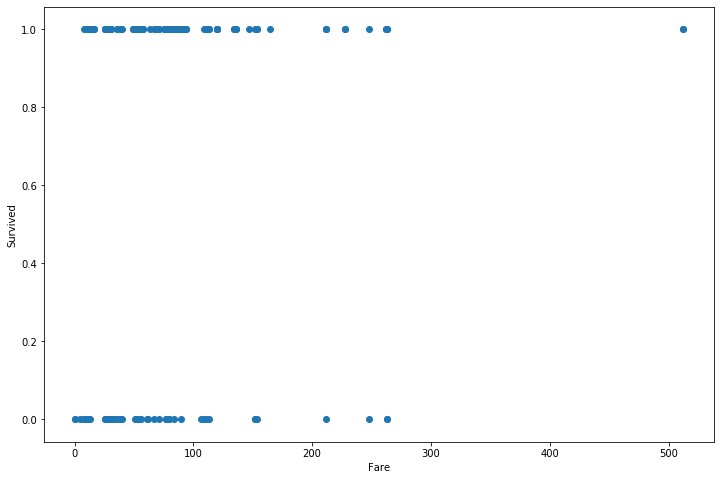

In [15]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(df['Fare'],df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [16]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,6,82
male,54,41


In [17]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,52,106
2,3,12
3,5,5


In [18]:
df_corr = df.corr()
df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


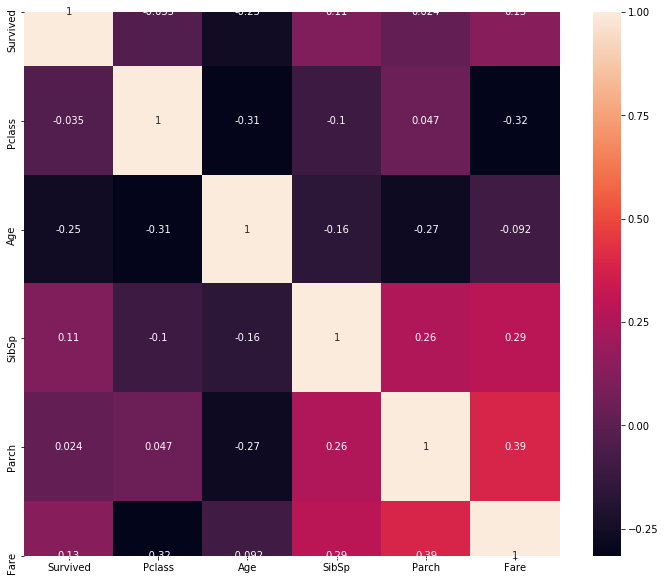

In [19]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)

### Data Preprocessing

In [20]:
# One hot encoding
df = pd.get_dummies(df,columns = ['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
1,1,1,female,38.0,1,0,71.2833,1,0,0
3,1,1,female,35.0,1,0,53.1000,0,0,1
6,0,1,male,54.0,0,0,51.8625,0,0,1
10,1,3,female,4.0,1,1,16.7000,0,0,1
11,1,1,female,58.0,0,0,26.5500,0,0,1


In [21]:
# Label Encoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'].astype(str))


In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
1,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,1
6,0,1,1,54.0,0,0,51.8625,0,0,1
10,1,3,0,4.0,1,1,16.7000,0,0,1
11,1,1,0,58.0,0,0,26.5500,0,0,1


In [23]:
df.shape

(183, 10)

### Logistic Regression Model

In [24]:
x = df.drop('Survived',axis=1)
y=df['Survived']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train.shape,y_train.shape

((146, 9), (146,))

In [27]:
#Logistic Regression Classifier
logisticModel = LogisticRegression(random_state = Seed)
logisticModel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5000, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
## Metrics  
y_test_pred = logisticModel.predict(x_test)

In [29]:
accuracyScore = accuracy_score(y_true = y_test,y_pred=y_test_pred)
accuracyScore

0.8378378378378378

In [30]:
print(classification_report(y_true=y_test,y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.85      0.92      0.88        25

    accuracy                           0.84        37
   macro avg       0.83      0.79      0.81        37
weighted avg       0.84      0.84      0.83        37



### Random forest classifier